In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Wrangling

First, I need to read in the different individual csv files downloaded from the FRED Database and assign Column Names.

In [2]:
min_wage = pd.read_csv('FedMinWage.csv')
min_wage.columns = ['Date', 'Min Wage']
min_wage

,Date,Min Wage
0,1967-10-01,1.40
1,1968-01-01,1.60
2,1968-04-01,1.60
3,1968-07-01,1.60
4,1968-10-01,1.60
...,...,...
210,2020-04-01,7.25
211,2020-07-01,7.25
212,2020-10-01,7.25
213,2021-01-01,7.25


In [3]:
cpi = pd.read_csv('CPI.csv')
cpi.columns = ['Date', 'CPI']
cpi

,Date,CPI
0,1967-10-01,34.73361
1,1968-01-01,35.14344
2,1968-04-01,35.55328
3,1968-07-01,35.96311
4,1968-10-01,36.37295
...,...,...
210,2020-04-01,264.13627
211,2020-07-01,266.68033
212,2020-10-01,266.87910
213,2021-01-01,271.39037


In [4]:
unemployment_rate = pd.read_csv('UnemploymentRate.csv')
unemployment_rate.columns = ['Date', 'Unemployment Rate']
unemployment_rate

,Date,Unemployment Rate
0,1967-10-01,3.8
1,1968-01-01,3.7
2,1968-04-01,3.7
3,1968-07-01,3.4
4,1968-10-01,3.4
...,...,...
210,2020-04-01,11.1
211,2020-07-01,7.8
212,2020-10-01,6.7
213,2021-01-01,6.0


In [5]:
gdp = pd.read_csv('USGDPPerCapita.csv')
gdp.columns = ['Date', 'Per Capita GDP']
gdp

,Date,Per Capita GDP
0,1967-10-01,23144.0
1,1968-01-01,23566.0
2,1968-04-01,23905.0
3,1968-07-01,24025.0
4,1968-10-01,24054.0
...,...,...
210,2020-04-01,52314.0
211,2020-07-01,56182.0
212,2020-10-01,56732.0
213,2021-01-01,57568.0


In [6]:
lfp = pd.read_csv('LFParticip.csv')
lfp.columns = ['Date', 'Labor Force Participation']
lfp

,Date,Labor Force Participation
0,1967-10-01,59.9
1,1968-01-01,59.6
2,1968-04-01,60.0
3,1968-07-01,59.5
4,1968-10-01,59.7
...,...,...
210,2020-04-01,61.4
211,2020-07-01,61.4
212,2020-10-01,61.5
213,2021-01-01,61.5


In [7]:
med_income = pd.read_csv('MedianIncome.csv')
med_income.columns = ['Date', 'Median Income']
med_income.Date = pd.to_datetime(med_income.Date)
med_income

,Date,Median Income
0,1974-01-01,25326
1,1975-01-01,24846
2,1976-01-01,24896
3,1977-01-01,25084
4,1978-01-01,24877
5,1979-01-01,24193
6,1980-01-01,23826
7,1981-01-01,23382
8,1982-01-01,23629
9,1983-01-01,24091


Next, I need to bring the individual dataframes together in to one dataframe, and convert the Date column to Datetime format.  I am using merge to bring in the median income data, as this dataframe does not have the same # of rows as the others.  The Median Income data is annual, as opposed to quarterly.

In [8]:
df_temp = pd.concat([min_wage, cpi.CPI, unemployment_rate['Unemployment Rate'], gdp['Per Capita GDP'], lfp['Labor Force Participation']], axis=1)
df_temp.Date = pd.to_datetime(df_temp.Date)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       215 non-null    datetime64[ns]
 1   Min Wage                   215 non-null    float64       
 2   CPI                        215 non-null    float64       
 3   Unemployment Rate          215 non-null    float64       
 4   Per Capita GDP             215 non-null    float64       
 5   Labor Force Participation  215 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 10.2 KB


In [9]:
#Performing the Merge and confirming

df = pd.merge(df_temp, med_income, how = 'outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       215 non-null    datetime64[ns]
 1   Min Wage                   215 non-null    float64       
 2   CPI                        215 non-null    float64       
 3   Unemployment Rate          215 non-null    float64       
 4   Per Capita GDP             215 non-null    float64       
 5   Labor Force Participation  215 non-null    float64       
 6   Median Income              47 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.4 KB


In [10]:
df.sample(10)

,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income
101,1993-01-01,4.25,147.13115,7.0,38053.0,66.2,27289.0
48,1979-10-01,2.90,78.58607,6.0,30164.0,63.9,NaN
6,1969-04-01,1.60,37.50000,3.5,24399.0,60.1,NaN
203,2018-07-01,7.25,258.64652,3.7,57095.0,62.7,NaN
180,2012-10-01,7.25,235.24693,7.9,51732.0,63.7,NaN
10,1970-04-01,1.60,39.75410,4.9,24163.0,60.2,NaN
138,2002-04-01,5.15,184.32377,5.8,46866.0,66.6,NaN
13,1971-01-01,1.60,40.98361,6.0,24535.0,60.0,NaN
192,2015-10-01,7.25,242.34119,5.0,54260.0,62.7,NaN
182,2013-04-01,7.25,239.24590,7.5,52099.0,63.4,NaN


Everything Looks good, except now I want to impute quarterly values for the Median Income.  I have records for January, but not for each April, July, or October. For these records, I'm going to impute values based on assuming a basic linear regression throughout the year.  
Since our Median Income variable does not go as far back as our other values, There will still be some NaN values in the column.  I don't have enough information to impute data for these, so I will leave the NaN #'s for those records. 

In [11]:
df[['Date', 'Median Income']].loc[25:37]

,Date,Median Income
25,1974-01-01,25326.0
26,1974-04-01,NaN
27,1974-07-01,NaN
28,1974-10-01,NaN
29,1975-01-01,24846.0
30,1975-04-01,NaN
31,1975-07-01,NaN
32,1975-10-01,NaN
33,1976-01-01,24896.0
34,1976-04-01,NaN


In [12]:
for n in range(48):

    i = 25 + 4 * (n-1)
    end_mi = df.loc[(i+4)]['Median Income']
    start_mi = df.loc[i]['Median Income']
    annual_diff = end_mi - start_mi
    qtr_diff = annual_diff / 4
    df['Median Income'].loc[(i+1)] = start_mi + qtr_diff
    df['Median Income'].loc[(i+2)] = (start_mi + (qtr_diff * 2))
    df['Median Income'].loc[(i+3)] = (start_mi + (qtr_diff * 3))
    


C:\Users\drewc\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
#confirming the changes have taken place

df[['Date', 'Median Income']].loc[25:37]


,Date,Median Income
25,1974-01-01,25326.0
26,1974-04-01,25206.0
27,1974-07-01,25086.0
28,1974-10-01,24966.0
29,1975-01-01,24846.0
30,1975-04-01,24858.5
31,1975-07-01,24871.0
32,1975-10-01,24883.5
33,1976-01-01,24896.0
34,1976-04-01,24943.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       215 non-null    datetime64[ns]
 1   Min Wage                   215 non-null    float64       
 2   CPI                        215 non-null    float64       
 3   Unemployment Rate          215 non-null    float64       
 4   Per Capita GDP             215 non-null    float64       
 5   Labor Force Participation  215 non-null    float64       
 6   Median Income              185 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.4 KB


All the quarterly values for Median income where we have pertinent data are now filled in. The data is now ready to be further explored.

In [15]:
df.CPI = df.CPI.round(2)
df

,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income
0,1967-10-01,1.40,34.73,3.8,23144.0,59.9,NaN
1,1968-01-01,1.60,35.14,3.7,23566.0,59.6,NaN
2,1968-04-01,1.60,35.55,3.7,23905.0,60.0,NaN
3,1968-07-01,1.60,35.96,3.4,24025.0,59.5,NaN
4,1968-10-01,1.60,36.37,3.4,24054.0,59.7,NaN
...,...,...,...,...,...,...,...
210,2020-04-01,7.25,264.14,11.1,52314.0,61.4,NaN
211,2020-07-01,7.25,266.68,7.8,56182.0,61.4,NaN
212,2020-10-01,7.25,266.88,6.7,56732.0,61.5,NaN
213,2021-01-01,7.25,271.39,6.0,57568.0,61.5,NaN


# Data Exploration

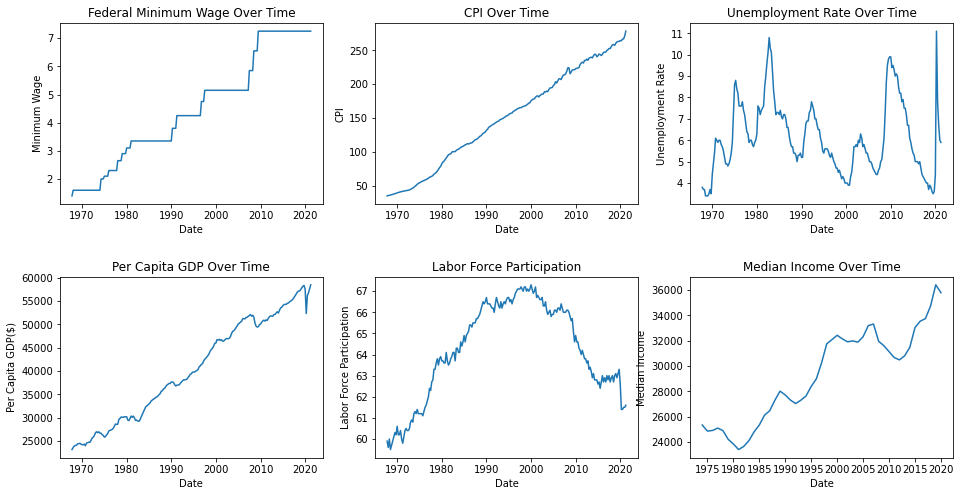

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
fig.subplots_adjust(hspace=.4)

ax[0, 0].plot(df["Date"], df["Min Wage"])
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("Minimum Wage")
ax[0, 0].set_title("Federal Minimum Wage Over Time")

ax[0, 1].plot(df['Date'], df['CPI'])
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('CPI')
ax[0, 1].set_title('CPI Over Time')

ax[0, 2].plot(df['Date'], df['Unemployment Rate'])
ax[0, 2].set_xlabel('Date')
ax[0, 2].set_ylabel('Unemployment Rate')
ax[0, 2].set_title('Unemployment Rate Over Time')

ax[1, 0].plot(df['Date'], df['Per Capita GDP'])
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Per Capita GDP($)')
ax[1, 0].set_title('Per Capita GDP Over Time')

ax[1, 1].plot(df['Date'], df['Labor Force Participation'])
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Labor Force Participation')
ax[1, 1].set_title('Labor Force Participation')

ax[1, 2].plot(df['Date'], df['Median Income'])
ax[1, 2].set_xlabel('Date')
ax[1, 2].set_ylabel('Median Income')
ax[1, 2].set_title('Median Income Over Time')

plt.show()

What I really want to see is the change between values in given years, not necessarily the raw values themselves. I am going to create some new columns for CPI, GDP, Median Income, and Unemployment Rate, by calculated the change from quarter to quarter

In [17]:
df['CPI % increase'] = df['CPI'].pct_change()
df['GDP % increase'] = df['Per Capita GDP'].pct_change()
df['Med inc % increase'] = df['Median Income'].pct_change()
df['Unemployment Change'] = df['Unemployment Rate'].diff()

The Co-vid Pandemic of the last year and a half has had a large impact on all of our economic #'s which may skew any information we pull from this period.  Since it as the very end of our time range, we have more than enough info to simply elimate the last rows of the database.

In [18]:
df.tail()

,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income,CPI % increase,GDP % increase,Med inc % increase,Unemployment Change
210,2020-04-01,7.25,264.14,11.1,52314.0,61.4,NaN,-0.001210,-0.090381,0.0,6.7
211,2020-07-01,7.25,266.68,7.8,56182.0,61.4,NaN,0.009616,0.073938,0.0,-3.3
212,2020-10-01,7.25,266.88,6.7,56732.0,61.5,NaN,0.000750,0.009790,0.0,-1.1
213,2021-01-01,7.25,271.39,6.0,57568.0,61.5,NaN,0.016899,0.014736,0.0,-0.7
214,2021-04-01,7.25,278.38,5.9,58454.0,61.6,NaN,0.025756,0.015390,0.0,-0.1


In [19]:
df.drop(df.tail(5).index, inplace=True)

As we don't have the data prior to October, 1967, and there is an immediate adjustment in minimum wage right after that, I am going to cut off the first few rows of data to allow us to start at a time when there has been no minimum wage increase for at least one year.

In [20]:
df.drop(df.index[:5], inplace=True)
df=df.reset_index(drop=True)
df

,Date,Min Wage,CPI,Unemployment Rate,Per Capita GDP,Labor Force Participation,Median Income,CPI % increase,GDP % increase,Med inc % increase,Unemployment Change
0,1969-01-01,1.60,36.99,3.4,24380.0,59.9,NaN,0.017047,0.013553,NaN,0.0
1,1969-04-01,1.60,37.50,3.5,24399.0,60.1,NaN,0.013788,0.000779,NaN,0.1
2,1969-07-01,1.60,38.01,3.7,24491.0,60.3,NaN,0.013600,0.003771,NaN,0.2
3,1969-10-01,1.60,38.63,3.5,24300.0,60.2,NaN,0.016311,-0.007799,NaN,-0.2
4,1970-01-01,1.60,39.14,4.4,24204.0,60.6,NaN,0.013202,-0.003951,NaN,0.9
...,...,...,...,...,...,...,...,...,...,...,...
200,2019-01-01,7.25,260.45,3.8,57432.0,63.1,36426.00,0.011810,0.005005,0.011672,-0.1
201,2019-04-01,7.25,262.44,3.6,57826.0,62.9,36270.75,0.007641,0.006860,-0.004262,-0.2
202,2019-07-01,7.25,263.07,3.5,58141.0,63.1,36115.50,0.002401,0.005447,-0.004280,-0.1
203,2019-10-01,7.25,263.29,3.6,58333.0,63.3,35960.25,0.000836,0.003302,-0.004299,0.1


Looking at all 50+ years of data at once makes it difficult to pinpoint specific detailed trends.  By splitting the dataset up, we should be able to see a little more detail.  
I'm first simply looking at the Federal minimum wage to help locate exactly when minimum wage raises were made.

In [21]:
df_1 = df.loc[0:44]
df_2 = df.loc[44:84]
df_3 = df.loc[84:124]
df_4 = df.loc[124:164]
df_5 = df.loc[164:]

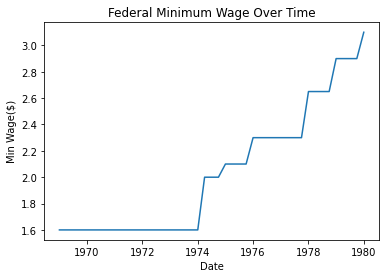

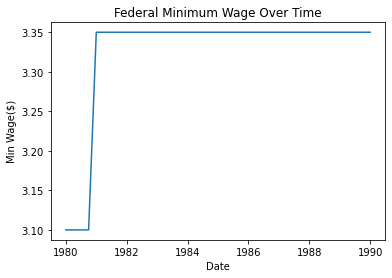

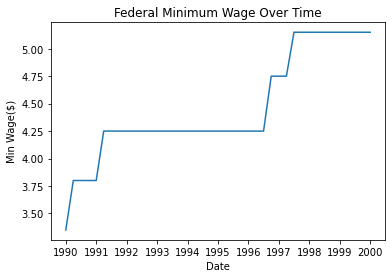

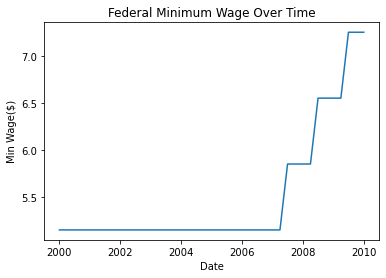

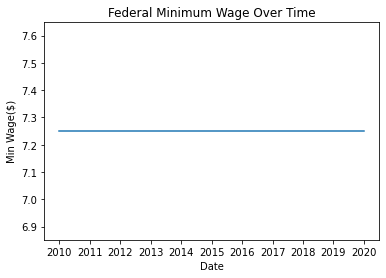

In [22]:
df_temp_list = [df_1, df_2, df_3, df_4, df_5]
for item in df_temp_list:
    plt.plot(item['Date'], item['Min Wage'])
    plt.xlabel('Date')
    plt.ylabel('Min Wage($)')
    plt.title('Federal Minimum Wage Over Time')
    plt.show()



In [23]:
df['Min Wage'].unique()

array([1.6 , 2.  , 2.1 , 2.3 , 2.65, 2.9 , 3.1 , 3.35, 3.8 , 4.25, 4.75,
       5.15, 5.85, 6.55, 7.25])

Looking at the Minimum Wage trends, There are some periods where we have some minimum wage increases, but then other stretches of several years without any increases.  We can break our information down based on these estimated periods.

1969 - 1974: No min wage increases (1.60)

1974 - 1976: 3 min wage increases (1.60 to 2.30)

1977: No increases (2.30)

1977 - 1981: 4 increases (2.30 to 3.35)

1981 - 1990: No increase (3.35)

1990 - 1991: 2 increases (3.35 to 4.25)

1992 - 1997: No increases (4.25)

1997: 2 increases (4.25 to 5.15)

1998 - 2007: No increases (5.15)

2007 - 2009: 3 increases (5.15 to 7.25)

2010 - 2020: No min wage increase (7.25)

For further exploration and testing, I want to separate years in to 2 different subsets by assigning rows to 2 different dataframes based on whether each row is part of a period affected by a minimum wage raise or not.  Any observation within one year of a minimum wage raise will go in to the "increase" subset, while all other observations will go in to the "no_increase" subset.

BUT I CANT FIGURE OUT HOW TO GET IT TO WORK YET :(

In [24]:
# increase = pd.DataFrame(columns = df.columns)
# no_increase = pd.DataFrame(columns = df.columns)

# for i in range(205):
#    if i < 4:
#        no_increase.append(df.loc[i])
#    elif df['Min Wage'][i] > df['Min Wage'][(i-4)]:
#        increase.append(df.loc[i])
#    elif df['Min Wage'][i] > df['Min Wage'][(i-3)]:
#        increase.append(df.loc[i])
#    elif df['Min Wage'][i] > df['Min Wage'][(i-2)]:
#        increase.append(df.loc[i])
#    elif df['Min Wage'][i] > df['Min Wage'][(i-1)]:
#        increase.append(df.loc[i])
#    else:
#        no_increase.append(df.loc[i])

# I'm just getting 2 empty dataframes



Next, I'm going to break the dataframe up again, but this time make the divisions based on the alternating periods of time where there was no increase and years during and immediately after increases.

I'm going to call these new separated dataframes df1 thru df11.  When the number after df is odd, the period referenced in that dataframe is one where there was no minimum wage increase, and when it's even there has been changes in the minimum wage during those periods.

In [25]:
df1 = df.loc[0:20]
df2 = df.loc[21:31]
df3 = df.loc[32:35]
df4 = df.loc[36:51]
df5 = df.loc[52:84]
df6 = df.loc[85:92]
df7 = df.loc[93:110]
df8 = df.loc[111:117]
df9 = df.loc[118:153]
df10 = df.loc[154:166]
df11 = df.loc[167:]

Now, I want to plot my columns from these separated dataframes

In [26]:
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

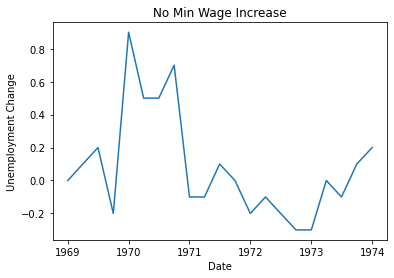

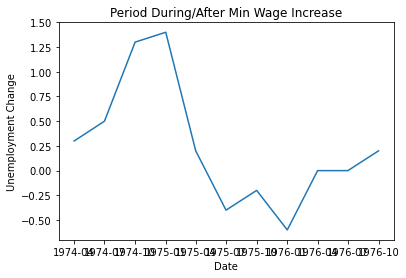

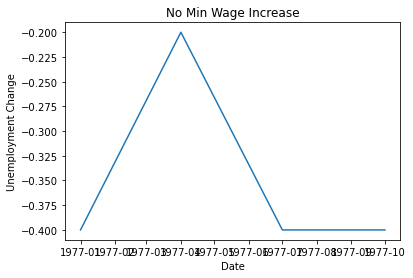

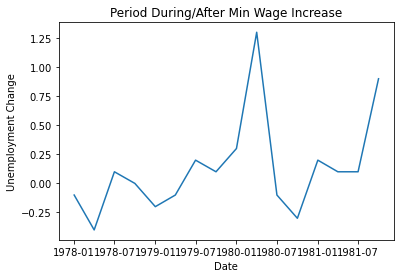

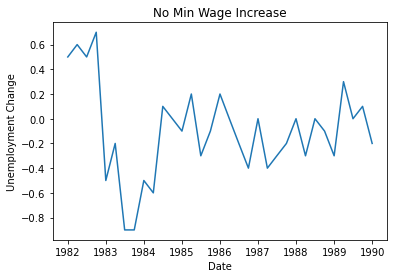

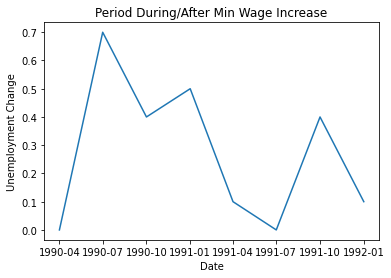

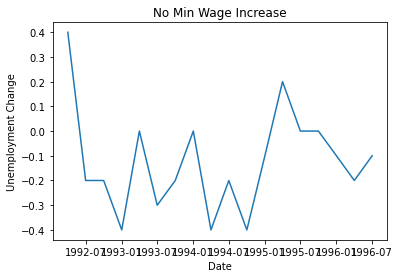

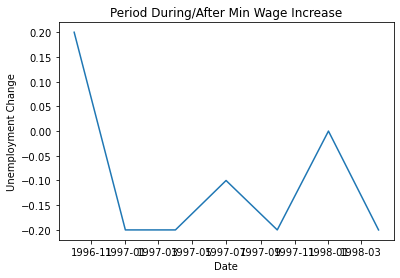

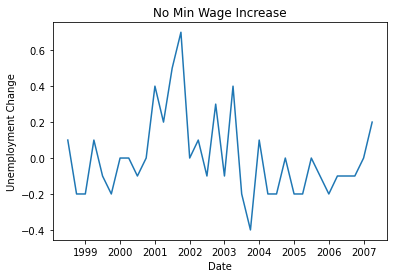

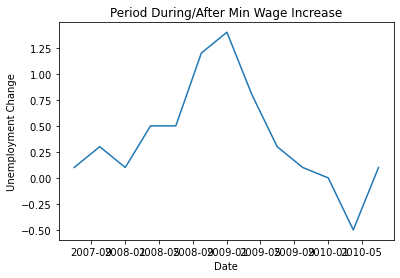

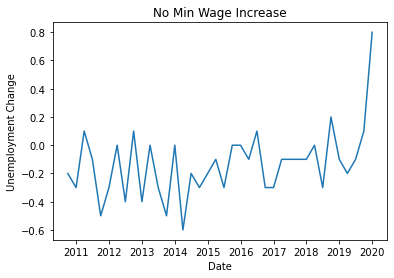

In [27]:
num = 0

for item in df_list:
    num += 1
    plt.plot(item['Date'], item['Unemployment Change'])
    plt.xlabel('Date')
    plt.ylabel('Unemployment Change')
    if num % 2 == 0:
        plt.title('Period During/After Min Wage Increase')
    else:
        plt.title('No Min Wage Increase')
    plt.show()

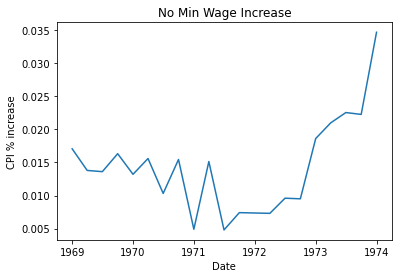

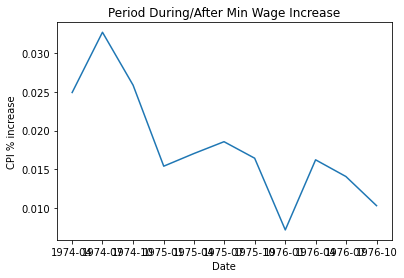

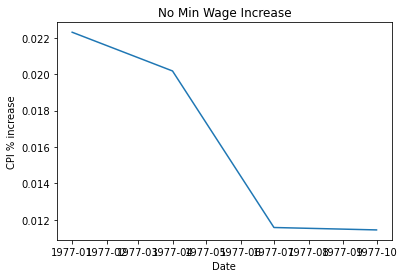

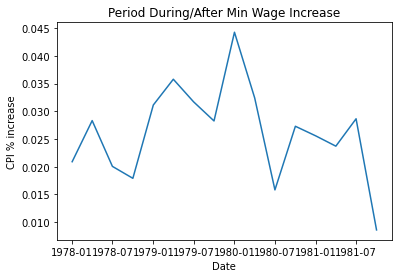

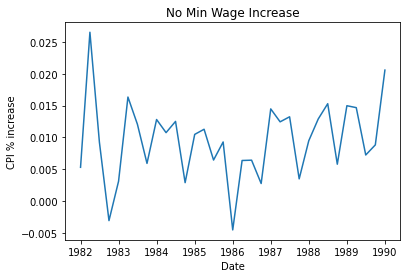

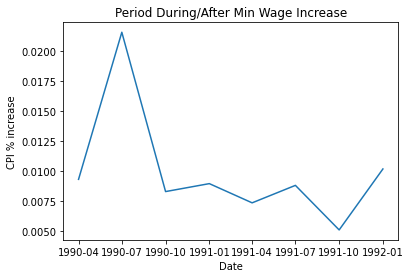

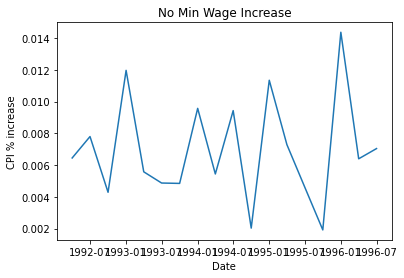

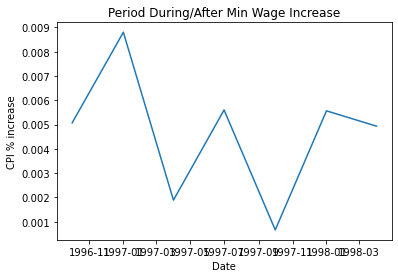

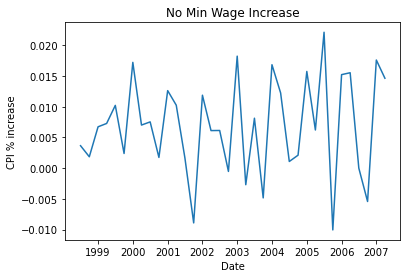

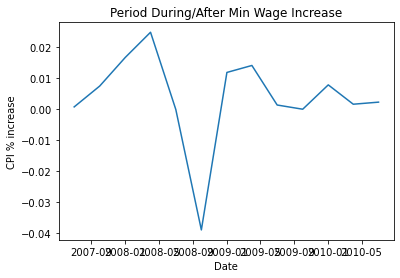

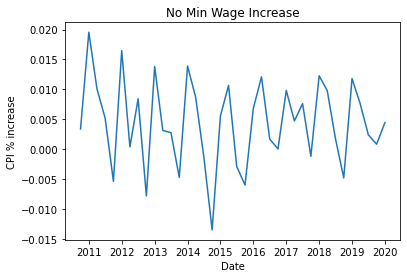

In [28]:
num = 0

for item in df_list:
    num += 1
    plt.plot(item['Date'], item['CPI % increase'])
    plt.xlabel('Date')
    plt.ylabel('CPI % increase')
    if num % 2 == 0:
        plt.title('Period During/After Min Wage Increase')
    else:
        plt.title('No Min Wage Increase')
    plt.show()

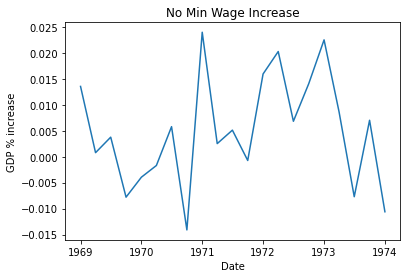

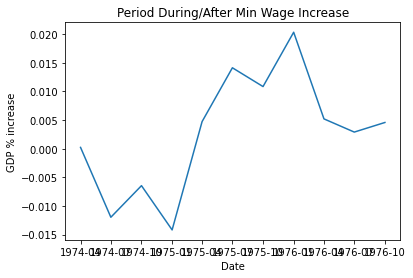

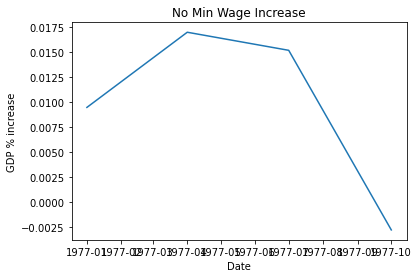

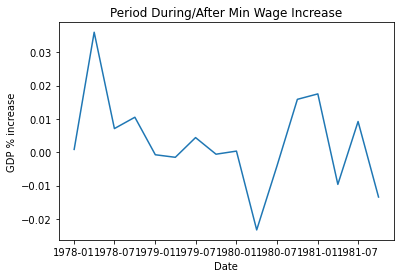

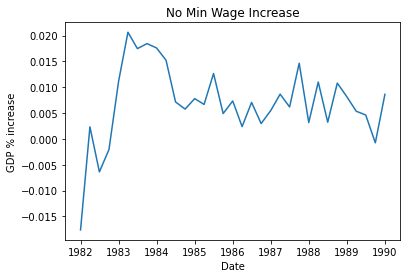

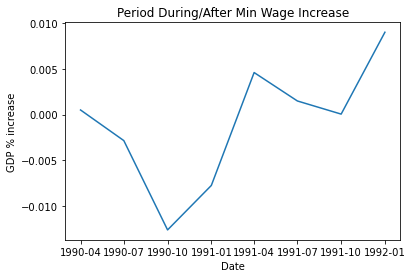

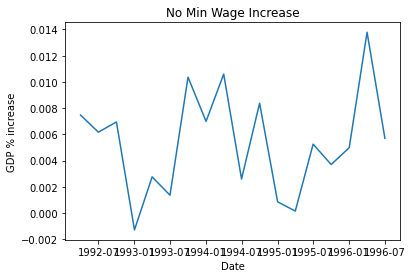

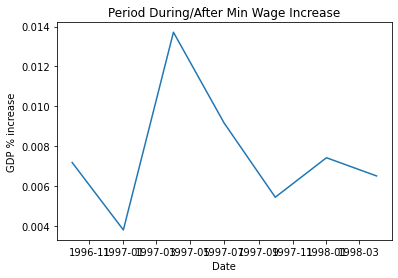

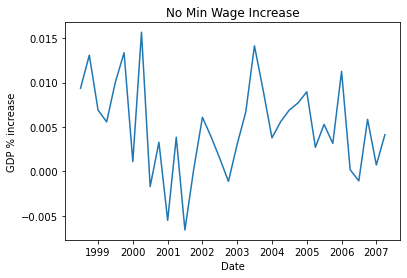

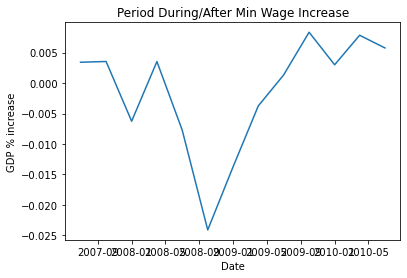

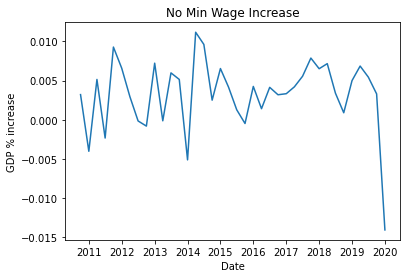

In [29]:
num = 0

for item in df_list:
    num += 1
    plt.plot(item['Date'], item['GDP % increase'])
    plt.xlabel('Date')
    plt.ylabel('GDP % increase')
    if num % 2 == 0:
        plt.title('Period During/After Min Wage Increase')
    else:
        plt.title('No Min Wage Increase')
    plt.show()



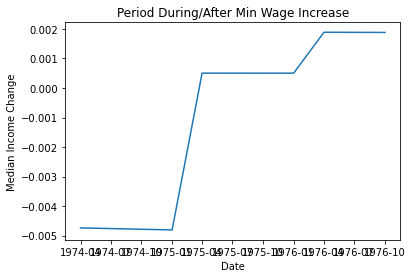

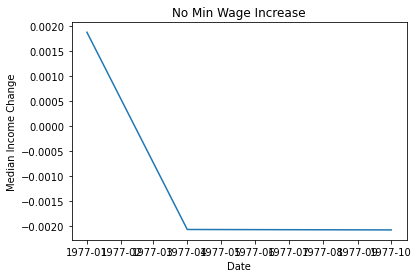

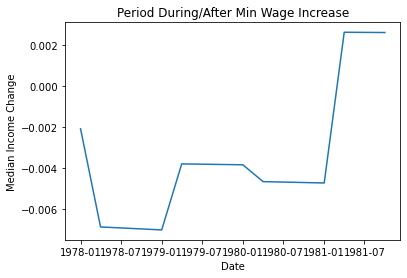

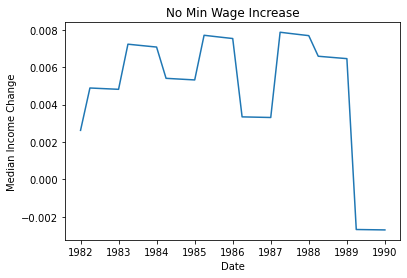

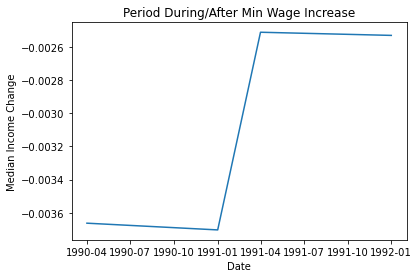

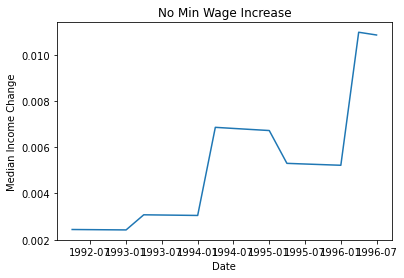

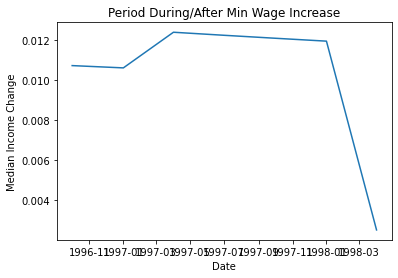

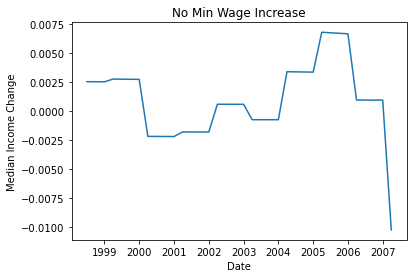

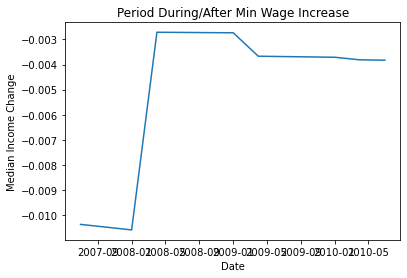

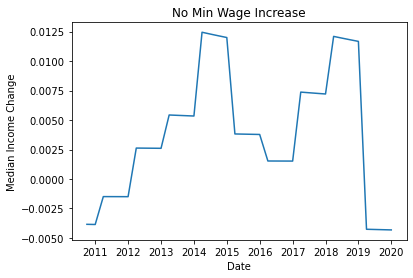

In [30]:
num = 0

for item in df_list:
    num += 1
    if num ==1:
        continue
    plt.plot(item['Date'], item['Med inc % increase'])
    plt.xlabel('Date')
    plt.ylabel('Median Income Change')
    if num % 2 == 0:
        plt.title('Period During/After Min Wage Increase')
    else:
        plt.title('No Min Wage Increase')
    plt.show()
    

In [31]:
no_increase = pd.concat([df1, df3, df5, df7, df9, df11]) 
increase = pd.concat([df2, df4, df6, df8, df10])

print('Average CPI increase during periods of no minimum wage increase:', no_increase['CPI % increase'].mean())
print('Average CPI increase during periods of minimum wage increases:', increase['CPI % increase'].mean())

print('Average Unemployment Change during periods of no minimum wage increase:', no_increase['Unemployment Change'].mean())
print('Average Unemployment Change during periods of minimum wage increases:', increase['Unemployment Change'].mean())

print('Average Median Income Change during periods of no minimum wage increase:', no_increase['Med inc % increase'].mean())
print('Average Median Income Change during periods of minimum wage increases:', increase['Med inc % increase'].mean())

print('Average GDP Change during periods of no minimum wage increase:', no_increase['GDP % increase'].mean())
print('Average GDP Change during periods of minimum wage increases:', increase['GDP % increase'].mean())

Average CPI increase during periods of no minimum wage increase: 0.008152987611928907
Average CPI increase during periods of minimum wage increases: 0.01418429578412364
Average Unemployment Change during periods of no minimum wage increase: -0.068
Average Unemployment Change during periods of minimum wage increases: 0.20363636363636362
Average Median Income Change during periods of no minimum wage increase: 0.0033601208310310338
Average Median Income Change during periods of minimum wage increases: -0.001533958866997934
Average GDP Change during periods of no minimum wage increase: 0.005162948286239444
Average GDP Change during periods of minimum wage increases: 0.001919239449584304


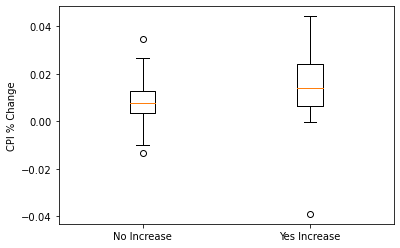

In [32]:
plt.boxplot([no_increase['CPI % increase'], increase['CPI % increase']])
plt.ylabel('CPI % Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

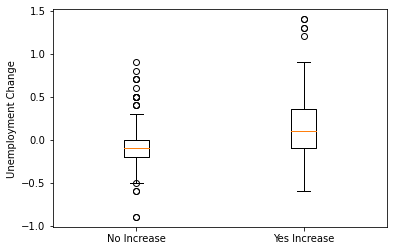

In [33]:
plt.boxplot([no_increase['Unemployment Change'], increase['Unemployment Change']])
plt.ylabel('Unemployment Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

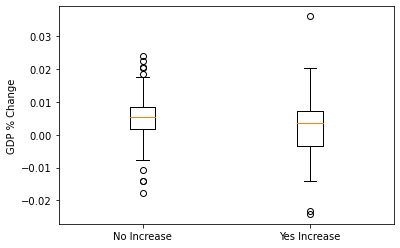

In [34]:
plt.boxplot([no_increase['GDP % increase'], increase['GDP % increase']])
plt.ylabel('GDP % Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

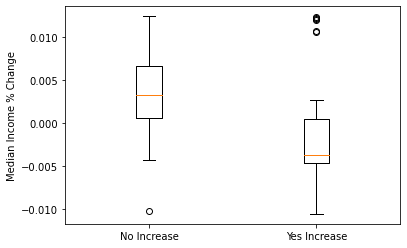

In [35]:
#Have to Filter the NaN's out for Median income

filt_no_inc = no_increase[~np.isnan(no_increase['Med inc % increase'])]
filt_inc = increase[~np.isnan(increase['Med inc % increase'])]
plt.boxplot([filt_no_inc['Med inc % increase'], filt_inc['Med inc % increase']])
plt.ylabel('Median Income % Change')
plt.xticks([1, 2], ['No Increase', 'Yes Increase'])
plt.show()

The Average of each economic indicator is a little bit "worse" # when taken from periods during and after minimum wage changes. For GDP and Median Income, there appears to be slightly less growth during min wage increase years.  The CPI appears to increase slightly more following increases.  Most notably, the Unemployment rate appears to show the largest difference.  In the years of minimum wage increases, we show unemployment #'s averaging an **increase** of 0.2, as compared to slight **decrease** of around 0.06 in other years.

The next step will be determine if the difference in these #'s is large enough to consider the minimum wage a clear determinant of these changes.